# Segmentación de Especies con Cluster Analysis

### Integrantes Grupo 8:
- Pedro Pablo Arriola Jimenez (20188)
- Jose Rodrigo Barrera Garcia (20807)


El conjunto de datos de la flor **Iris** es uno de los más populares para el Aprendizaje de Máquina (ML).  Si no lo conocen, pueden leer sobre él en:

https://en.wikipedia.org/wiki/Iris_flower_data_set

El conjunto de datos *iris.csv* tiene cuatro variables:  

* **sepal length** (longitud del sépalo), 
* **sepal width** (ancho del sépalo), 
* **petal length** (longitud del pétalo), 
* **petal width** (ancho del pétalo).

### Seccion 1.1 - Analisis exploratorio y K-Means con data normal

In [62]:
# Se importan las librerias necesarias para abordar el problema

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kneed import DataGenerator, KneeLocator

# Se lee el archivo csv utilizando pandas para tener acceso a los datos de forma clara
data = pd.read_csv("iris.csv")
data

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [63]:
# Se hara una descripcion estadistica de los datos
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [64]:
# Se exploran los datos en busca de datos faltantes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [65]:
# Se verifica una vez que no se tengan valores nulos que afecten el analisis y construccion del modelo
print("Deteccion de valores nulos por columna")
data.isna().any()

Deteccion de valores nulos por columna


sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
dtype: bool

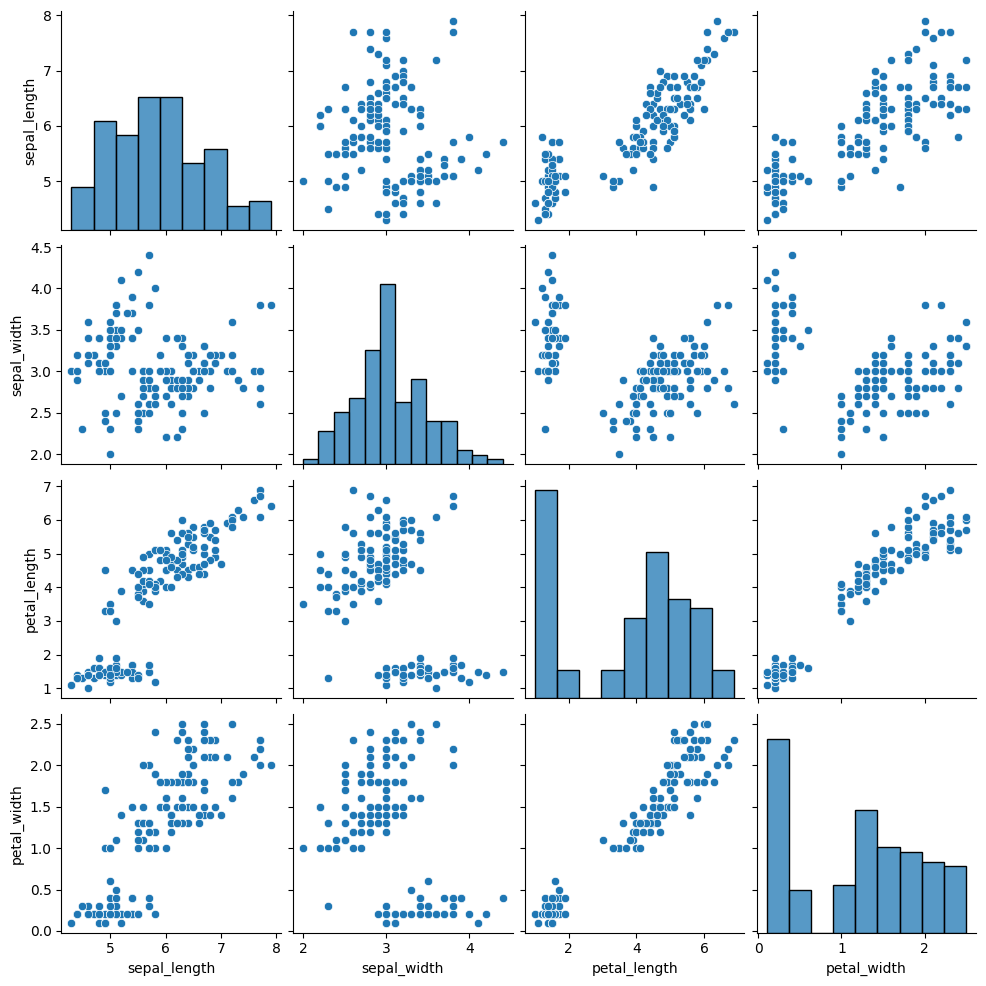

In [66]:
# Se grafican scatterplots para observar si existen grupos ya existentes dentro de la data
sns.pairplot(data)

#### Se puede observar claramente que hay cierta relacion entre los datos y que tambien se puede observar que se pueden crear clusters a partir de los datos. En este caso podemos ver un claro ejemplo entre sepal_length y sepal_width.

#### Se analizara la correlacion entre los datos para tener un parametro mas claro y asi poder tomar la decision de que datos se pondran a prueba con el modelo de K-Means.

<AxesSubplot: >

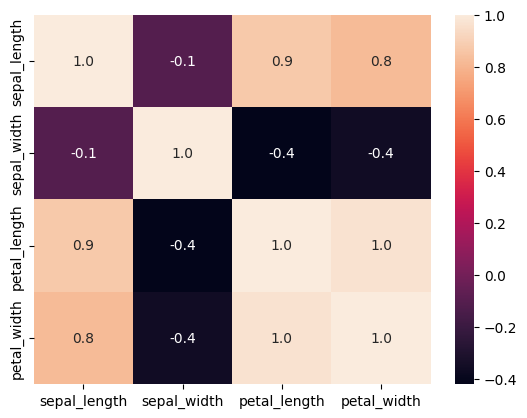

In [67]:
correlation = data.corr()
sns.heatmap(correlation, annot=True, fmt=".1f")

#### Con este analisis, ya podemos determinar que existe una fuerte relacion entre las variables sepal_length y petal_width, sepal_length y petal_length, petal_width y petal_length

In [68]:
# Se separa los datos para clasificar
X = data.filter(['sepal_width', 'sepal_length'])
X

,sepal_width,sepal_length
0,3.5,5.1
1,3.0,4.9
2,3.2,4.7
3,3.1,4.6
4,3.6,5.0
...,...,...
145,3.0,6.7
146,2.5,6.3
147,3.0,6.5
148,3.4,6.2


In [69]:
# Se instancia el modelo de K-Means
kmeans = KMeans(2)

# Ajustar o afinar el modelo con los datos de entrada (y el número de clusters especificados)
kmeans.fit(X)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=2)

In [70]:
# Crear una variable que contenga los clusters que se han predicho para cada observación

clusters_identificados = kmeans.fit_predict(X)

# Revisar los resultados

clusters_identificados

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0], dtype=int32)

In [71]:
# Crear una copia de los datos

data_con_clusters = data.copy()

# Crear una nueva serie, que tenga el cluster identificado para cada observación

data_con_clusters['Cluster'] = clusters_identificados

# Revisar el resultado

data_con_clusters

,sepal_length,sepal_width,petal_length,petal_width,Cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


In [72]:
import plotly.express as px

fig = px.scatter(data_con_clusters, 
                 x = "sepal_length", 
                 y = "sepal_width", 
                 color = "Cluster",
                 labels={
                     "sepal_length": "Sepal Length (cm)",
                     "sepal_width": "Sepal Width (cm)"
                    },
                 title="K-Means Clustering de Sepal Length y Sepal Width con K = 2 (Datos normales)"
                )

fig.update_xaxes(range=[4, 8])
fig.update_yaxes(range=[0, 5])

fig.show()

### Seccion 1.2 - K-Means con datos estandarizados

In [73]:
from sklearn.preprocessing import StandardScaler

# Se realiza una estandarizacion de los datos para que se ajusten mejor al modelo
scaler = StandardScaler()


# Se ajusta la data al scaler para estandarizar los datos
standard_data = scaler.fit_transform(X)

standard_df = data.copy()

standard_df[['sepal_width', 'sepal_length']] = standard_data

standard_df

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,1.4,0.2
1,-1.143017,-0.124958,1.4,0.2
2,-1.385353,0.337848,1.3,0.2
3,-1.506521,0.106445,1.5,0.2
4,-1.021849,1.263460,1.4,0.2
...,...,...,...,...
145,1.038005,-0.124958,5.2,2.3
146,0.553333,-1.281972,5.0,1.9
147,0.795669,-0.124958,5.2,2.0
148,0.432165,0.800654,5.4,2.3


In [74]:
# Se extraen los datos estandarizados para clasificarlos
X_STD = standard_df.filter(['sepal_width', 'sepal_length'])

In [75]:
# Se instancia el modelo de K-Means
kmeans_std = KMeans(2)

# Ajustar o afinar el modelo con los datos de entrada (y el número de clusters especificados)
kmeans_std.fit(X_STD)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=2)

In [76]:
# Crear una variable que contenga los clusters que se han predicho para cada observación

clusters_identificados_std = kmeans.fit_predict(X_STD)

# Revisar los resultados

clusters_identificados_std

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [77]:
# Crear una copia de los datos

data_con_clusters_std = standard_df.copy()

# Crear una nueva serie, que tenga el cluster identificado para cada observación

data_con_clusters_std['Cluster'] = clusters_identificados_std

# Revisar el resultado

data_con_clusters_std

,sepal_length,sepal_width,petal_length,petal_width,Cluster
0,-0.900681,1.032057,1.4,0.2,0
1,-1.143017,-0.124958,1.4,0.2,0
2,-1.385353,0.337848,1.3,0.2,0
3,-1.506521,0.106445,1.5,0.2,0
4,-1.021849,1.263460,1.4,0.2,0
...,...,...,...,...,...
145,1.038005,-0.124958,5.2,2.3,1
146,0.553333,-1.281972,5.0,1.9,1
147,0.795669,-0.124958,5.2,2.0,1
148,0.432165,0.800654,5.4,2.3,1


In [78]:
fig_std = px.scatter(data_con_clusters_std, 
                 x = "sepal_length", 
                 y = "sepal_width", 
                 color = "Cluster",
                 labels={
                     "sepal_length": "Sepal Length (cm)",
                     "sepal_width": "Sepal Width (cm)"
                    },
                 title="K-Means Clustering de Sepal Length y Sepal Width con K = 2 (Datos estandarizados)"
                )
fig_std.update_xaxes(range=[-3, 3])
fig_std.update_yaxes(range=[-3, 4])

fig_std.show()

#### Con los datos estandarizados podemos observar que el clustering funciona mejor debido a que ahora los datos muestran claramente cierto nivel de separacion lo cual permite observar facilmente los clusters que fueron generados.

### Seccion 1.3 - Metodo del codo manual

In [79]:
def elbow_plot(df):
    """Create elbow plot from normalized data"""
    
    sse = {}
    
    X_STD_ELBOW = df.filter(['sepal_width', 'sepal_length'])
    
    for k in range(1, 21):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X_STD_ELBOW)
        sse[k] = kmeans.inertia_
    
    plt.title('Metodo del codo para la seleccion del numero de Clusters (K)')
    plt.xlabel('k')
    plt.ylabel('SSE')
    sns.pointplot(x=list(sse.keys()),
                 y=list(sse.values()))
    plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` expl

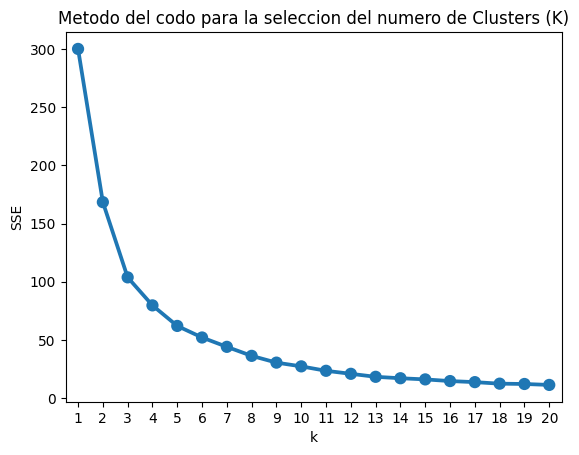

In [80]:
elbow_plot(standard_df)

### Seccion 1.4 - Comparacion K-Means y cantidad de clusters K

In [81]:
# En este se definiran 3 clusters
kmeans_three = KMeans(3)

# Ajustar o afinar el modelo con los datos de entrada (y el número de clusters especificados)
kmeans_three.fit(X_STD)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=3)

In [82]:
# Crear una variable que contenga los clusters que se han predicho para cada observación

clusters_identificados_three = kmeans_three.fit_predict(X_STD)

# Revisar los resultados

clusters_identificados_three

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int32)

In [83]:
# Crear una copia de los datos

data_con_clusters_three = standard_df.copy()

# Crear una nueva serie, que tenga el cluster identificado para cada observación

data_con_clusters_three['Cluster'] = clusters_identificados_three

# Revisar el resultado

data_con_clusters_three

,sepal_length,sepal_width,petal_length,petal_width,Cluster
0,-0.900681,1.032057,1.4,0.2,2
1,-1.143017,-0.124958,1.4,0.2,2
2,-1.385353,0.337848,1.3,0.2,2
3,-1.506521,0.106445,1.5,0.2,2
4,-1.021849,1.263460,1.4,0.2,2
...,...,...,...,...,...
145,1.038005,-0.124958,5.2,2.3,0
146,0.553333,-1.281972,5.0,1.9,1
147,0.795669,-0.124958,5.2,2.0,0
148,0.432165,0.800654,5.4,2.3,0


In [84]:
fig_std = px.scatter(data_con_clusters_three, 
                 x = "sepal_length", 
                 y = "sepal_width", 
                 color = "Cluster",
                 labels={
                     "sepal_length": "Sepal Length (cm)",
                     "sepal_width": "Sepal Width (cm)"
                    },
                 title="K-Means Clustering de Sepal Length y Sepal Width con K = 3 (Datos Estandarizados)"
                )
fig_std.update_xaxes(range=[-3, 3])
fig_std.update_yaxes(range=[-3, 4])

fig_std.show()

In [85]:
# En este se definiran 6 clusters
kmeans_six = KMeans(6)

# Ajustar o afinar el modelo con los datos de entrada (y el número de clusters especificados)
kmeans_six.fit(X_STD)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=6)

In [86]:
# Crear una variable que contenga los clusters que se han predicho para cada observación

clusters_identificados_six = kmeans_six.fit_predict(X_STD)

# Revisar los resultados

clusters_identificados_six

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([3, 1, 1, 1, 3, 3, 1, 1, 1, 1, 3, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 1, 1, 1, 1, 3, 1, 1, 1, 3, 3, 3, 1, 1, 3, 1, 1, 1, 3, 2, 1, 3,
       3, 1, 3, 1, 3, 1, 0, 0, 0, 2, 4, 4, 0, 2, 0, 2, 2, 4, 2, 4, 4, 0,
       4, 4, 2, 2, 0, 4, 4, 4, 4, 0, 0, 0, 4, 2, 2, 2, 4, 4, 1, 0, 0, 2,
       4, 2, 2, 4, 4, 2, 4, 4, 4, 4, 2, 4, 0, 4, 5, 4, 0, 5, 2, 5, 4, 5,
       0, 4, 0, 2, 4, 0, 0, 5, 5, 2, 0, 4, 5, 4, 0, 5, 4, 4, 4, 5, 5, 5,
       4, 4, 4, 5, 0, 0, 4, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 4], dtype=int32)

In [87]:
# Crear una copia de los datos

data_con_clusters_six = standard_df.copy()

# Crear una nueva serie, que tenga el cluster identificado para cada observación

data_con_clusters_six['Cluster'] = clusters_identificados_six

# Revisar el resultado

data_con_clusters_six

,sepal_length,sepal_width,petal_length,petal_width,Cluster
0,-0.900681,1.032057,1.4,0.2,3
1,-1.143017,-0.124958,1.4,0.2,1
2,-1.385353,0.337848,1.3,0.2,1
3,-1.506521,0.106445,1.5,0.2,1
4,-1.021849,1.263460,1.4,0.2,3
...,...,...,...,...,...
145,1.038005,-0.124958,5.2,2.3,0
146,0.553333,-1.281972,5.0,1.9,4
147,0.795669,-0.124958,5.2,2.0,0
148,0.432165,0.800654,5.4,2.3,0


In [88]:
fig_std = px.scatter(data_con_clusters_six, 
                 x = "sepal_length", 
                 y = "sepal_width", 
                 color = "Cluster",
                 labels={
                     "sepal_length": "Sepal Length (cm)",
                     "sepal_width": "Sepal Width (cm)"
                    },
                 title="K-Means Clustering de Sepal Length y Sepal Width con K = 6 (Datos Estandarizados)"
                )
fig_std.update_xaxes(range=[-3, 3])
fig_std.update_yaxes(range=[-3, 4])

fig_std.show()

In [89]:
# En este se definiran 9 clusters
kmeans_nine = KMeans(9)

# Ajustar o afinar el modelo con los datos de entrada (y el número de clusters especificados)
kmeans_nine.fit(X_STD)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=9)

In [90]:
# Crear una variable que contenga los clusters que se han predicho para cada observación

clusters_identificados_nine = kmeans_nine.fit_predict(X_STD)

# Revisar los resultados

clusters_identificados_nine

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([8, 1, 1, 1, 8, 2, 8, 8, 1, 1, 2, 8, 1, 1, 2, 2, 2, 8, 2, 2, 8, 2,
       8, 8, 8, 1, 8, 8, 8, 1, 1, 8, 2, 2, 1, 1, 8, 1, 1, 8, 8, 4, 1, 8,
       2, 1, 2, 1, 2, 8, 0, 0, 0, 4, 3, 3, 0, 4, 0, 4, 4, 3, 6, 3, 3, 0,
       3, 3, 6, 4, 0, 3, 6, 3, 3, 0, 5, 0, 3, 3, 4, 4, 3, 3, 3, 0, 0, 6,
       3, 4, 4, 3, 3, 4, 3, 3, 3, 3, 4, 3, 0, 3, 5, 3, 0, 5, 4, 5, 6, 7,
       0, 3, 0, 4, 3, 0, 0, 7, 5, 6, 0, 3, 5, 3, 0, 5, 3, 3, 3, 5, 5, 7,
       3, 3, 3, 5, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 6, 0, 0, 3], dtype=int32)

In [91]:
# Crear una copia de los datos

data_con_clusters_nine = standard_df.copy()

# Crear una nueva serie, que tenga el cluster identificado para cada observación

data_con_clusters_nine['Cluster'] = clusters_identificados_nine

# Revisar el resultado

data_con_clusters_nine

,sepal_length,sepal_width,petal_length,petal_width,Cluster
0,-0.900681,1.032057,1.4,0.2,8
1,-1.143017,-0.124958,1.4,0.2,1
2,-1.385353,0.337848,1.3,0.2,1
3,-1.506521,0.106445,1.5,0.2,1
4,-1.021849,1.263460,1.4,0.2,8
...,...,...,...,...,...
145,1.038005,-0.124958,5.2,2.3,0
146,0.553333,-1.281972,5.0,1.9,6
147,0.795669,-0.124958,5.2,2.0,0
148,0.432165,0.800654,5.4,2.3,0


In [92]:
fig_std = px.scatter(data_con_clusters_nine, 
                 x = "sepal_length", 
                 y = "sepal_width", 
                 color = "Cluster",
                 labels={
                     "sepal_length": "Sepal Length (cm)",
                     "sepal_width": "Sepal Width (cm)"
                    },
                 title="K-Means Clustering de Sepal Length y Sepal Width con K = 9 (Datos Estandarizados)"
                )
fig_std.update_xaxes(range=[-3, 3])
fig_std.update_yaxes(range=[-3, 4])

fig_std.show()

### Comparando los datos reales con los datos que se utilizaro para el clustering, es importante mencionar que los datos reales presentan solo tres clasificaciones de dichas flores, por lo tanto, el numero de clusters ideal para clasificar los datos reales es igual a 3 (K = 3).

### Seccion 2.1 - K-Means con las variables petal_width y petal_length (Normales)

In [93]:
# Se separa los datos para clasificar
X = data.filter(['petal_width', 'petal_length'])
X

,petal_width,petal_length
0,0.2,1.4
1,0.2,1.4
2,0.2,1.3
3,0.2,1.5
4,0.2,1.4
...,...,...
145,2.3,5.2
146,1.9,5.0
147,2.0,5.2
148,2.3,5.4


In [94]:
# Se instancia el modelo de K-Means
kmeans = KMeans(2)

# Ajustar o afinar el modelo con los datos de entrada (y el número de clusters especificados)
kmeans.fit(X)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=2)

In [95]:
# Crear una variable que contenga los clusters que se han predicho para cada observación

clusters_identificados = kmeans.fit_predict(X)

# Revisar los resultados

clusters_identificados

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [96]:
# Se grafican los datos normales con K-Means Clustering
fig = px.scatter(data_con_clusters, 
                 x = "petal_length", 
                 y = "petal_width", 
                 color = "Cluster",
                 labels={
                     "sepal_length": "Petal Length (cm)",
                     "sepal_width": "Petal Width (cm)"
                    },
                 title="K-Means Clustering de Petal Length y Petal Width con K = 2 (Datos normales)"
                )
fig.update_xaxes(range=[0, 7])
fig.update_yaxes(range=[-1, 5])

fig.show()

### Seccion 2.2 - K-Means con las variables petal_width y petal_length (Estandarizados)

In [97]:
# Se ajusta la data al scaler para estandarizar los datos
standard_data_petal = scaler.fit_transform(X)

standard_df_petal = data.copy()

standard_df_petal[['petal_width', 'petal_length']] = standard_data_petal

standard_df_petal

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,-1.341272,-1.312977
1,4.9,3.0,-1.341272,-1.312977
2,4.7,3.2,-1.398138,-1.312977
3,4.6,3.1,-1.284407,-1.312977
4,5.0,3.6,-1.341272,-1.312977
...,...,...,...,...
145,6.7,3.0,0.819624,1.447956
146,6.3,2.5,0.705893,0.922064
147,6.5,3.0,0.819624,1.053537
148,6.2,3.4,0.933356,1.447956


In [98]:
# Se extraen los datos estandarizados para clasificarlos
X_STD = standard_df_petal.filter(['petal_width', 'petal_length'])
X_STD

,petal_width,petal_length
0,-1.312977,-1.341272
1,-1.312977,-1.341272
2,-1.312977,-1.398138
3,-1.312977,-1.284407
4,-1.312977,-1.341272
...,...,...
145,1.447956,0.819624
146,0.922064,0.705893
147,1.053537,0.819624
148,1.447956,0.933356


In [99]:
# Se instancia el modelo de K-Means
kmeans_std = KMeans(2)

# Ajustar o afinar el modelo con los datos de entrada (y el número de clusters especificados)
kmeans_std.fit(X_STD)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=2)

In [100]:
# Crear una variable que contenga los clusters que se han predicho para cada observación

clusters_identificados_std = kmeans.fit_predict(X_STD)

# Revisar los resultados

clusters_identificados_std

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [101]:
# Crear una copia de los datos

data_con_clusters_std = standard_df_petal.copy()

# Crear una nueva serie, que tenga el cluster identificado para cada observación

data_con_clusters_std['Cluster'] = clusters_identificados_std

# Revisar el resultado

data_con_clusters_std

,sepal_length,sepal_width,petal_length,petal_width,Cluster
0,5.1,3.5,-1.341272,-1.312977,0
1,4.9,3.0,-1.341272,-1.312977,0
2,4.7,3.2,-1.398138,-1.312977,0
3,4.6,3.1,-1.284407,-1.312977,0
4,5.0,3.6,-1.341272,-1.312977,0
...,...,...,...,...,...
145,6.7,3.0,0.819624,1.447956,1
146,6.3,2.5,0.705893,0.922064,1
147,6.5,3.0,0.819624,1.053537,1
148,6.2,3.4,0.933356,1.447956,1


In [102]:
fig_std = px.scatter(data_con_clusters_std, 
                 x = "petal_length", 
                 y = "petal_width", 
                 color = "Cluster",
                 labels={
                     "sepal_length": "Petal Length (cm)",
                     "sepal_width": "Petal Width (cm)"
                    },
                 title="K-Means Clustering de Petal Length y Petal Width con K = 2 (Datos Estandarizados)"
                )
fig_std.update_xaxes(range=[-3, 3])
fig_std.update_yaxes(range=[-3, 4])

fig_std.show()

#### Con los datos estandarizados tambien podemos observar que el clustering funciona mejor para los datos de petal_width y petal_length debido a que ahora los datos muestran claramente cierto nivel de separacion lo cual permite observar facilmente los clusters que fueron generados.

### Seccion 2.3 - Metodo del codo para determinar numero de clusters para las variables petal_width y petal_length (K)

In [103]:
def elbow_plot_petal(df):
    """Create elbow plot from normalized data"""
    
    sse = {}
    
    X_STD_ELBOW = df.filter(['petal_width', 'petal_length'])
    
    for k in range(1, 21):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X_STD_ELBOW)
        sse[k] = kmeans.inertia_
    
    plt.title('Metodo del codo para la seleccion del numero de Clusters (K)')
    plt.xlabel('k')
    plt.ylabel('SSE')
    sns.pointplot(x=list(sse.keys()),
                 y=list(sse.values()))
    plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` expl

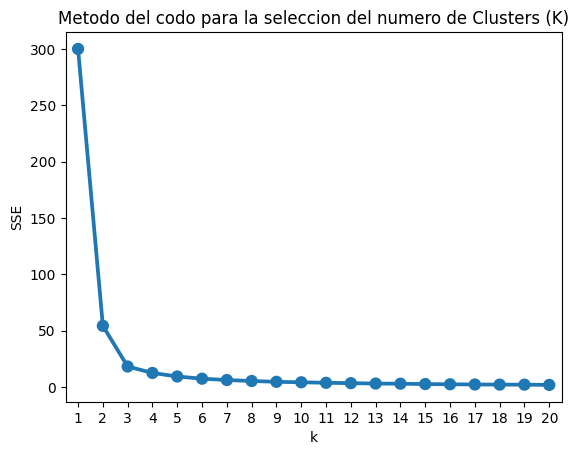

In [104]:
# Se grafica dicho metodo para determinar el numero de clusters que mejor se ajusta a nuestros datos
elbow_plot_petal(standard_df_petal)

### Seccion 2.4 -  Prueba de diferentes cantidades de clusters para observar cual se ajusta mejor a los datos

In [105]:
# Prueba con 3 clusters
# Se instancia el modelo de K-Means
kmeans_std_three_petal = KMeans(3)

# Ajustar o afinar el modelo con los datos de entrada (y el número de clusters especificados)
kmeans_std_three_petal.fit(X_STD)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=3)

In [106]:
# Crear una variable que contenga los clusters que se han predicho para cada observación

clusters_identificados_std_three_petal = kmeans_std_three_petal.fit_predict(X_STD)

# Revisar los resultados

clusters_identificados_std_three_petal

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [107]:
# Crear una copia de los datos

data_con_clusters_std_three_petal = standard_df_petal.copy()

# Crear una nueva serie, que tenga el cluster identificado para cada observación

data_con_clusters_std_three_petal['Cluster'] = clusters_identificados_std_three_petal

# Revisar el resultado

data_con_clusters_std_three_petal

,sepal_length,sepal_width,petal_length,petal_width,Cluster
0,5.1,3.5,-1.341272,-1.312977,0
1,4.9,3.0,-1.341272,-1.312977,0
2,4.7,3.2,-1.398138,-1.312977,0
3,4.6,3.1,-1.284407,-1.312977,0
4,5.0,3.6,-1.341272,-1.312977,0
...,...,...,...,...,...
145,6.7,3.0,0.819624,1.447956,2
146,6.3,2.5,0.705893,0.922064,2
147,6.5,3.0,0.819624,1.053537,2
148,6.2,3.4,0.933356,1.447956,2


In [108]:
fig_std = px.scatter(data_con_clusters_std_three_petal, 
                 x = "petal_length", 
                 y = "petal_width", 
                 color = "Cluster",
                 labels={
                     "sepal_length": "Petal Length (cm)",
                     "sepal_width": "Petal Width (cm)"
                    },
                 title="K-Means Clustering de Petal Length y Petal Width con K = 3 (Datos Estandarizados)"
                )
fig_std.update_xaxes(range=[-3, 3])
fig_std.update_yaxes(range=[-3, 4])

fig_std.show()

In [109]:
# Prueba con 6 clusters
# Se instancia el modelo de K-Means
kmeans_std_six_petal = KMeans(6)

# Ajustar o afinar el modelo con los datos de entrada (y el número de clusters especificados)
kmeans_std_six_petal.fit(X_STD)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=6)

In [110]:
# Crear una variable que contenga los clusters que se han predicho para cada observación

clusters_identificados_std_six_petal = kmeans_std_six_petal.fit_predict(X_STD)

# Revisar los resultados

clusters_identificados_std_six_petal

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 5, 5, 5, 2, 5, 5, 5, 2, 5, 2, 2, 5, 2, 5, 2, 5,
       5, 2, 5, 2, 0, 2, 5, 5, 2, 5, 5, 0, 5, 2, 2, 2, 2, 5, 5, 5, 5, 5,
       2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 3, 0, 3, 0, 3, 4, 5, 4, 0, 3,
       0, 0, 3, 0, 3, 3, 0, 4, 4, 5, 3, 0, 4, 0, 3, 4, 0, 0, 3, 0, 4, 4,
       3, 5, 5, 3, 3, 0, 0, 3, 3, 3, 0, 3, 3, 3, 0, 0, 3, 0], dtype=int32)

In [111]:
# Crear una copia de los datos

data_con_clusters_std_six_petal = standard_df_petal.copy()

# Crear una nueva serie, que tenga el cluster identificado para cada observación

data_con_clusters_std_six_petal['Cluster'] = clusters_identificados_std_six_petal

# Revisar el resultado

data_con_clusters_std_six_petal

,sepal_length,sepal_width,petal_length,petal_width,Cluster
0,5.1,3.5,-1.341272,-1.312977,1
1,4.9,3.0,-1.341272,-1.312977,1
2,4.7,3.2,-1.398138,-1.312977,1
3,4.6,3.1,-1.284407,-1.312977,1
4,5.0,3.6,-1.341272,-1.312977,1
...,...,...,...,...,...
145,6.7,3.0,0.819624,1.447956,3
146,6.3,2.5,0.705893,0.922064,0
147,6.5,3.0,0.819624,1.053537,0
148,6.2,3.4,0.933356,1.447956,3


In [112]:
fig_std = px.scatter(data_con_clusters_std_six_petal, 
                 x = "petal_length", 
                 y = "petal_width", 
                 color = "Cluster",
                 labels={
                     "sepal_length": "Petal Length (cm)",
                     "sepal_width": "Petal Width (cm)"
                    },
                 title="K-Means Clustering de Petal Length y Petal Width con K = 6 (Datos Estandarizados)"
                )
fig_std.update_xaxes(range=[-3, 3])
fig_std.update_yaxes(range=[-3, 4])

fig_std.show()

In [113]:
# Prueba con 9 clusters
# Se instancia el modelo de K-Means
kmeans_std_nine_petal = KMeans(9)

# Ajustar o afinar el modelo con los datos de entrada (y el número de clusters especificados)
kmeans_std_nine_petal.fit(X_STD)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=9)

In [114]:
# Crear una variable que contenga los clusters que se han predicho para cada observación

clusters_identificados_std_nine_petal = kmeans_std_nine_petal.fit_predict(X_STD)

# Revisar los resultados

clusters_identificados_std_nine_petal

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 7, 1, 7, 1, 1, 7,
       1, 7, 1, 1, 7, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7,
       7, 1, 1, 1, 1, 1, 4, 4, 4, 8, 4, 8, 4, 0, 8, 8, 0, 4, 0, 4, 0, 8,
       4, 0, 4, 0, 6, 8, 4, 8, 8, 8, 4, 6, 4, 0, 0, 0, 0, 4, 4, 4, 4, 8,
       8, 8, 8, 4, 8, 0, 8, 8, 8, 8, 0, 8, 5, 6, 5, 2, 5, 3, 4, 2, 2, 5,
       6, 6, 5, 6, 5, 5, 2, 3, 3, 4, 5, 6, 3, 6, 5, 2, 6, 6, 5, 2, 2, 3,
       5, 4, 2, 5, 5, 2, 6, 5, 5, 5, 6, 5, 5, 5, 6, 6, 5, 6], dtype=int32)

In [115]:
# Crear una copia de los datos

data_con_clusters_std_nine_petal = standard_df_petal.copy()

# Crear una nueva serie, que tenga el cluster identificado para cada observación

data_con_clusters_std_nine_petal['Cluster'] = clusters_identificados_std_nine_petal

# Revisar el resultado

data_con_clusters_std_nine_petal

,sepal_length,sepal_width,petal_length,petal_width,Cluster
0,5.1,3.5,-1.341272,-1.312977,1
1,4.9,3.0,-1.341272,-1.312977,1
2,4.7,3.2,-1.398138,-1.312977,1
3,4.6,3.1,-1.284407,-1.312977,1
4,5.0,3.6,-1.341272,-1.312977,1
...,...,...,...,...,...
145,6.7,3.0,0.819624,1.447956,5
146,6.3,2.5,0.705893,0.922064,6
147,6.5,3.0,0.819624,1.053537,6
148,6.2,3.4,0.933356,1.447956,5


In [116]:
fig_std = px.scatter(data_con_clusters_std_nine_petal, 
                 x = "petal_length", 
                 y = "petal_width", 
                 color = "Cluster",
                 labels={
                     "sepal_length": "Petal Length (cm)",
                     "sepal_width": "Petal Width (cm)"
                    },
                 title="K-Means Clustering de Petal Length y Petal Width con K = 2 (Datos Estandarizados)"
                )
fig_std.update_xaxes(range=[-3, 3])
fig_std.update_yaxes(range=[-3, 4])

fig_std.show()

### Tambien comparando los datos reales con los datos de petalos que se utilizaron para el clustering, es importante mencionar que los datos reales presentan solo tres clasificaciones de dichas flores, por lo tanto, el numero de clusters ideal para clasificar los datos reales es igual a 3 (K = 3).

### Seccion 3 - Metodo del codo con libreria Kneed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` expl

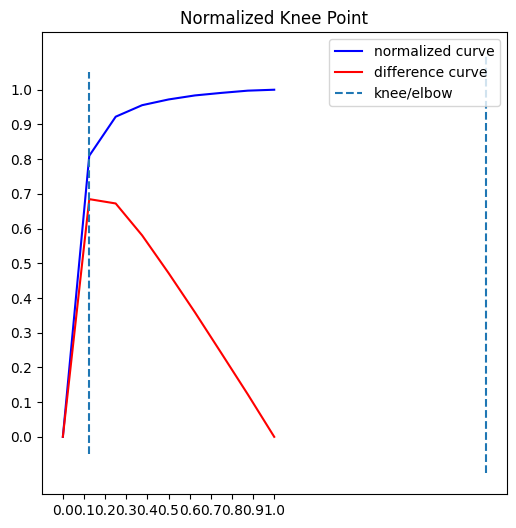

In [117]:
# Extraer los datos en un arreglo de Numpy
X = data.values

# Realizar el clustering con diferentes valores de k
sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    sum_of_squared_distances.append(km.inertia_)

# Encontrar el punto de codo utilizando la clase KneeLocator de Kneed
kneedle = KneeLocator(K, sum_of_squared_distances, curve='convex', direction='decreasing')

# Graficar el método del codo
kneedle.plot_knee_normalized()

# Marcar el punto de codo en el gráfico
plt.vlines(kneedle.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')

# Mostrar el gráfico
plt.show()

### Graficar el método del codo manualmente implica calcular los valores de SSE (suma de errores cuadráticos) para diferentes valores de k y graficarlos en un gráfico de línea. Luego, se examina la gráfica para identificar el punto de inflexión o el "codo", donde el valor de SSE parece estabilizarse o disminuir a una tasa más lenta. Este punto se utiliza para seleccionar el valor de k óptimo.

### Por otro lado, la librería Kneed automatiza el proceso de encontrar el punto de codo para un conjunto dado de valores de SSE. La función KneeLocator de Kneed encuentra el punto de codo a través de un análisis matemático que utiliza la curvatura de la gráfica de SSE para determinar la posición del codo.

### Comparando los resultados de dicha libreria y el cálculo manual del metodo del codo, podemos concluir que el cálculo manual resultó ser mejor para nosotros debido a que logró identificar que los datos se manejan adecuadamente con 3 clusters, mientras que KneeLocator, al momento de normalizar los datos, afectó por completo dicho resultado y mostró que 1 cluster es lo ideal, lo cual no tiene sentido debido a que los datos muestran claramente que son tres grupos de flores los que se están clusterizando para identificar los grupos diferentes que existen. Con esto podemos concluir que para abordar dichos datos y el entrenamiento del modelo de K-Means Clustering con las flores, es ideal trabajar con 3 clusters, ya que con esta métrica podremos clasificar adecuadamente los datos. También podemos concluir que calcular manualmente el método del codo resulta más efectivo ya que se trabaja con data cruda para realizar dicha gráfica, como lo es la data inertia, mientras que con la libreria se normalizan los datos y no se tiene tanto control del proceso, lo cual puede mostrar un resultado no deseado y que puede afectar enormemente el modelo, el rendimiento de dicho modelo y las predicciones que se quieran hacer ya que los datos saldrán sesgados.